#  AfterWork: Introduction to Machine Learning:  HR Evaluation Process

## 1. Defining the Question

### a) Specifying the Data Analysis Question

The task is to predict whether a potential promotee at a
checkpoint will be promoted or not after the evaluation process


### b) Defining the Metric for Success

We will have accomplished our objective if our prediction is accurate in picking potential promotees

### c) Understanding the Context

The client is a large Multinational Corporation, and they have nine broad verticals
across the organization. 
One of the problems the client faces is identifying the right
people for promotion (only for the manager position and below) and preparing them in
time.

Currently the process, is as follows:
1. They first identify a set of employees based on recommendations/ past
performance.
2. Selected employees go through the separate training and evaluation program for
each vertical.
3. These programs are based on the required skill of each vertical. At the end of the
program, based on various factors such as training performance, KPI completion
(only employees with KPIs completed greater than 80% are considered) etc., the
employee gets a promotion.

For the process mentioned above, the final promotions are only announced after the
evaluation, and this leads to a delay in transition to their new roles. Hence, the company
needs help in identifying the eligible candidates at a particular checkpoint so that
they can expedite the entire promotion cycle



### d) Recording the Experimental Design

1. Load libraries and datasets.
2. Prepare the data
3. Analyze the data
4. Machine learning modelling 
5. Predictions 
6. Conclusions and recommedation

### e) Data Relevance

The given data sets were relevant in answering the research question.

## 2. Data Cleaning & Analysis

###2.1.   Data cleaning & exploration

In [2]:
# Loading the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# To preview all rows and columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [38]:
# Setting the dataset url
hr_url = 'https://drive.google.com/file/d/1vr6xb-_bIDSLO7N0BsrUzQT6YcDtBA89/view?usp=sharing'

In [39]:
# Loading the dataset
df = pd.read_csv('https://drive.google.com/uc?id='+hr_url.split('/')[-2],low_memory=False)

In [40]:
# Previewing the first 5 records
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [45]:
#standardization of column names
df.columns = df.columns.str.strip().str.lower().str.replace(')','').str.replace('?','')
df.head(2)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,kpis_met >80%,awards_won,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0


In [46]:
# Getting our dataset shape

df.shape

#dataframe has 54808 rows and 14 columns


(54808, 14)

In [47]:
# Looking for duplicates
df.duplicated().sum()

#there are no duplicate values 

0

In [48]:
df.dtypes

employee_id               int64
department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
kpis_met >80%             int64
awards_won                int64
avg_training_score        int64
is_promoted               int64
dtype: object

In [49]:
# Looking for null values 

df.isnull().sum()

#2 columns are missing some observations: education & previous year rating 

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
kpis_met >80%              0
awards_won                 0
avg_training_score         0
is_promoted                0
dtype: int64

In [50]:
# A closer inspection of the missing observations 

df[df['education'].isnull()].head()
df['education'] = df['education'].fillna(df['education'].mode()[0])
df.isnull().sum()

#fill missing education values with the most appearing observations

employee_id                0
department                 0
region                     0
education                  0
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
kpis_met >80%              0
awards_won                 0
avg_training_score         0
is_promoted                0
dtype: int64

In [51]:
# A closer inspection of the missing observations 

df[df['previous_year_rating'].isnull()].head()
df['previous_year_rating'].fillna(df['previous_year_rating'].median(), inplace=True)
df.isnull().sum()

#replace missing previous year rating values with median value

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
kpis_met >80%           0
awards_won              0
avg_training_score      0
is_promoted             0
dtype: int64

In [52]:
#converting to int type

df['previous_year_rating']=df['previous_year_rating'].apply(np.int64)
df.dtypes

employee_id              int64
department              object
region                  object
education               object
gender                  object
recruitment_channel     object
no_of_trainings          int64
age                      int64
previous_year_rating     int64
length_of_service        int64
kpis_met >80%            int64
awards_won               int64
avg_training_score       int64
is_promoted              int64
dtype: object

### 2.2. General Analysis

In [53]:
df['is_promoted'].count()
# there are 54808 employees who were either promoted or not 

54808

In [54]:
df['is_promoted'].value_counts()
#91% of customers were not promoted whereas 8% were promoted 

0    50140
1     4668
Name: is_promoted, dtype: int64

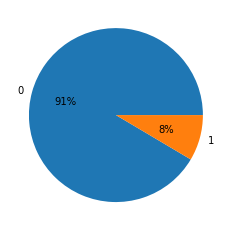

In [55]:
#distribution of promoted staff
df_promoted = df['is_promoted'].value_counts()
df_promoted

labels = df_promoted.index.tolist()
labels

plt.pie(df_promoted, labels=labels, autopct='%i%%');

In [56]:
df.dtypes

employee_id              int64
department              object
region                  object
education               object
gender                  object
recruitment_channel     object
no_of_trainings          int64
age                      int64
previous_year_rating     int64
length_of_service        int64
kpis_met >80%            int64
awards_won               int64
avg_training_score       int64
is_promoted              int64
dtype: object

In [57]:
df.describe()

non_numeric = ['department','region','education', 'gender']
numeric = ['employee_id', 'no_of_trainings','age','previous_year_rating','length_of_service',
           'kpis_met >80%','awards_won','avg_training_score','is_promoted' ]

In [58]:
df[non_numeric].describe()

#there are 9 departments, 34 regions, 4 education levels and 2 gender types from the dataframe
#most of the employees are in sales & marketing: 16840 from the total 
#most of the employees are in region 2: 12343 from the total 
#most of the employees have a bachelor's: 36669 from the total 
#most of the employees are male: 38496 from the total 

,department,region,education,gender
count,54808,54808,54808,54808
unique,9,34,3,2
top,Sales & Marketing,region_2,Bachelor's,m
freq,16840,12343,39078,38496


In [59]:
df[numeric].describe()

#most of the employees have been trained once 
#average age of employees is 34
#average rating for most employees is 3 
#average number of years served is 5
#most employees haven't reached the KPI score required
#most employees haven't received an award

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,kpis_met >80%,awards_won,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.304481,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.214770,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


Text(0.5, 1.0, 'Bar plot of promoted staff by gender')

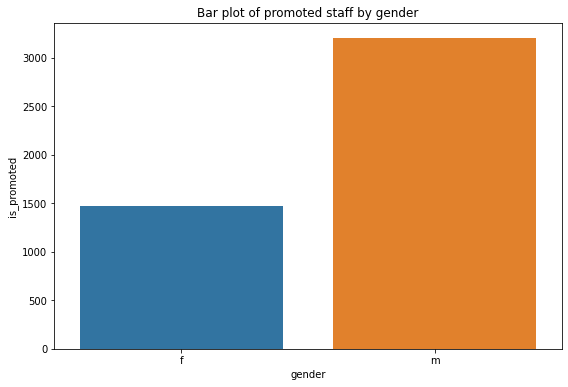

In [60]:
#group and filter data 
promoted = df[(df['is_promoted'] == 1)]
summary_gender = promoted.groupby(['gender'], as_index=False)['is_promoted'].count()

#bar plots of department by is_promoted
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (20, 6))

plt.subplot(1, 2, 1)
sns.barplot(data = summary_gender, x = 'gender', y = 'is_promoted')
plt.title('Bar plot of promoted staff by gender')

#most male staff are promoted 

Text(0.5, 1.0, 'Bar plot of promoted staff by department')

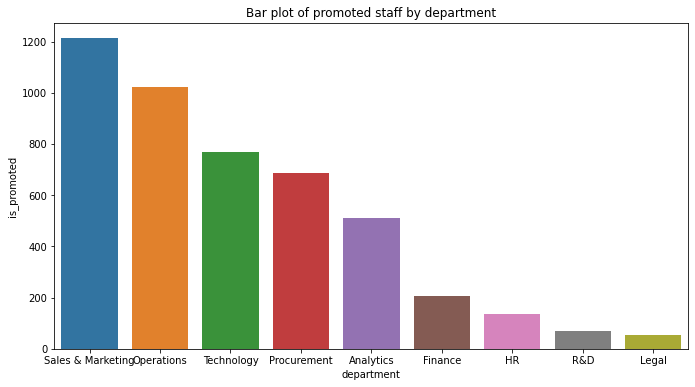

In [61]:
#group and filter data 
summary_department = promoted.groupby(['department'], as_index=False)['is_promoted'].count().sort_values(by='is_promoted', ascending=False)

#bar plots of department by is_promoted
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (25, 6))

plt.subplot(1, 2, 1)
sns.barplot(data = summary_department, x = 'department', y = 'is_promoted')
plt.title('Bar plot of promoted staff by department')

#most sales & marketing staff are promoted 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]),
 <a list of 34 Text major ticklabel objects>)

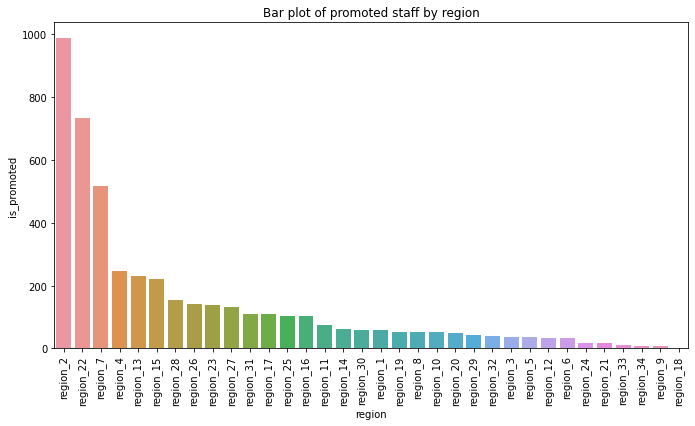

In [62]:
#group and filter data 
summary_region= promoted.groupby(['region'], as_index=False)['is_promoted'].count().sort_values(by='is_promoted', ascending=False)

#bar plots of region by is_promoted
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (25, 6))

plt.subplot(1, 2, 1)
sns.barplot(data = summary_region, x = 'region', y = 'is_promoted')
plt.title('Bar plot of promoted staff by region')
plt.xticks(rotation=90)

#most region 2 staff are promoted 


(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

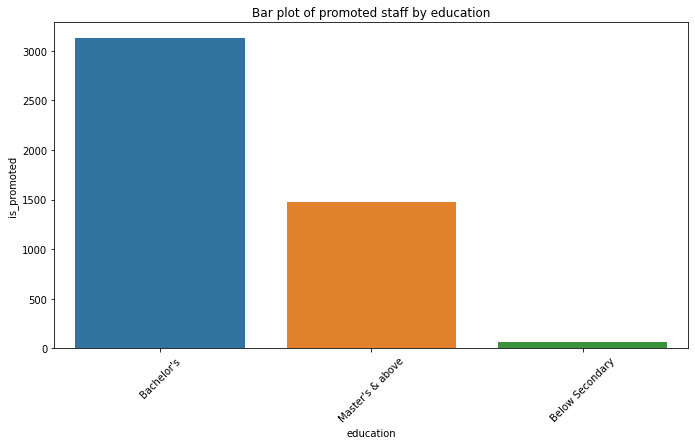

In [63]:
#group and filter data 
summary_education= promoted.groupby(['education'], as_index=False)['is_promoted'].count().sort_values(by='is_promoted', ascending=False)

#bar plots of education by is_promoted
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (25, 6))

plt.subplot(1, 2, 1)
sns.barplot(data = summary_education, x = 'education', y = 'is_promoted')
plt.title('Bar plot of promoted staff by education')
plt.xticks(rotation=45)

#most bachelors holder staff are promoted 

### 2.3. Machine Learning

In [64]:
#split into three parts: training, validation, and test
df_train = df[0:32884]
df_valid = df[32884:43846]
df_test = df[43846:54808]

#confirm size of datasets
print(df_train.shape)
print(df_valid.shape)
print(df_test.shape)

(32884, 14)
(10962, 14)
(10962, 14)


In [67]:
#import decision tree from sklearn library
from sklearn.tree import DecisionTreeClassifier

#creates a training dataset to be used 
features = df_train[['no_of_trainings','age','previous_year_rating','length_of_service',
           'kpis_met >80%','awards_won','avg_training_score' ]]

#Use is promoted as the target for my dataset
target = df_train['is_promoted']          

#create a model and assign it to a variable 
model = DecisionTreeClassifier(random_state=12345, max_depth=5)

#max_depth will optimize the model, and will define the number of trees to be used to prevent overfitting or underfitting
#determine whether to use it 

#train a model by calling the fit() method 
model.fit(features,target)

#predict answers and print results 
train_predictions = model.predict(features)
print(train_predictions)

[0 0 0 ... 0 0 0]


In [69]:
#creates a test training dataset to be used 
test_features = df_test[['no_of_trainings','age','previous_year_rating','length_of_service',
           'kpis_met >80%','awards_won','avg_training_score' ]]

#create test target 
test_target = df_test['is_promoted']  

#predict answers and print results 
test_predictions = model.predict(test_features)
print(test_predictions)


[0 0 0 ... 0 0 0]


In [70]:
#evaluation metric in sklearn library
from sklearn.metrics import accuracy_score 

Accuracy = accuracy_score(target,train_predictions)

print('Accuracy:',accuracy_score(target,train_predictions))
print('Test_ Accuracy', accuracy_score(test_target, test_predictions))
print('Training set:',train_predictions)
print('Test set:', test_predictions)

#accuracy score is high for both training and test dataset at max depth of 5


Accuracy: 0.925830190974334
Test_ Accuracy 0.9241926655719759
Training set: [0 0 0 ... 0 0 0]
Test set: [0 0 0 ... 0 0 0]


In [72]:
#on the training dataset while tuning model hyperparameters.
#validation to show how the model will act in the field to help reveal overfitting

'''
Declare 4 variables:
-features: features_train and features_valid
-target feature: target_train and target_valid
'''
#valid
features_valid = df_valid[['no_of_trainings','age','previous_year_rating','length_of_service',
           'kpis_met >80%','awards_won','avg_training_score' ]]
target_valid = df_valid['is_promoted']

#confirm size of datasets
print(target.shape)
print(features.shape)
print(features_valid.shape)
print(target_valid.shape)

(32884,)
(32884, 7)
(10962, 7)
(10962,)


In [73]:
#Tuning Hyperparameters

for depth in range (1,14):
  model = DecisionTreeClassifier(max_depth=depth)
  #training the model
  model.fit(features,target)
  #find predictions using validation set 
  predictions_valid=model.predict(features_valid)

  print("max_depth =", depth, ": ", end =' ')
  print(accuracy_score(target_valid, predictions_valid))

#max_depth 5 is the most approriate since it has highest accuracy

max_depth = 1 :  0.9203612479474549
max_depth = 2 :  0.9203612479474549
max_depth = 3 :  0.9203612479474549
max_depth = 4 :  0.9232804232804233
max_depth = 5 :  0.9234628717387338
max_depth = 6 :  0.9223681809888706
max_depth = 7 :  0.9216383871556285
max_depth = 8 :  0.9215471629264733
max_depth = 9 :  0.9212734902390075
max_depth = 10 :  0.921455938697318
max_depth = 11 :  0.9191753329684365
max_depth = 12 :  0.9172596241561759
max_depth = 13 :  0.9168947272395548


### 2.4. Predictions

In [86]:
df.head(1)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,kpis_met >80%,awards_won,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5,8,1,0,49,0


In [88]:
#check with predict poba
y_test = model.predict(features)
y_test_prob = model.predict_proba(features)
y_test_prob

prediction_result = pd.DataFrame(data={'id':df_train['employee_id'],'region':df_train['region'],'gender':df_train['gender'],'education':df_train['education'],'department':df_train['department'],'no_of_trainings':df_train['no_of_trainings'],'awards_won':df_train['awards_won'], 'previous_year_rating':df_train['previous_year_rating'], 'prediction':y_test, "probability":y_test_prob[:,1]})
prediction_result.sort_values(by='prediction',ascending =False).head()


,id,region,gender,education,department,no_of_trainings,awards_won,previous_year_rating,prediction,probability
3468,70507,region_2,f,Master's & above,Sales & Marketing,2,0,3,1,0.6
3467,57593,region_23,m,Master's & above,Technology,1,0,1,1,1.0
23549,69187,region_2,m,Bachelor's,Procurement,1,1,5,1,1.0
9598,11560,region_22,m,Bachelor's,Sales & Marketing,1,0,5,1,1.0
15493,70312,region_7,f,Master's & above,Procurement,1,0,3,1,1.0


In [76]:
prediction_promoted = prediction_result[(prediction_result['prediction'] == 1)]
prediction_gender = prediction_promoted.groupby(['gender'], as_index=False)['prediction'].count()
prediction_gender

#from the train dataset more male staff are likely to be promoted

,gender,prediction
0,f,243
1,m,530


In [80]:
prediction_region = prediction_promoted.groupby(['region'], as_index=False)['prediction'].count()
prediction_region.sort_values(by='prediction',ascending =False).head()

#from the train dataset more region 2 staff are likely to be promoted

,region,prediction
10,region_2,184
13,region_22,113
29,region_7,85
4,region_13,45
26,region_4,36


In [81]:
prediction_education = prediction_promoted.groupby(['education'], as_index=False)['prediction'].count()
prediction_education

#from the train dataset more bachelor holder staff are likely to be promoted

,education,prediction
0,Bachelor's,489
1,Below Secondary,7
2,Master's & above,277


In [98]:
prediction_department = prediction_promoted.groupby(['department'], as_index=False)['prediction'].count()
prediction_department.sort_values(by='prediction',ascending =False).head()

#from the train dataset more staff in sales & marketing are likely to be promoted

,department,prediction
7,Sales & Marketing,194
8,Technology,156
4,Operations,149
0,Analytics,107
5,Procurement,101


## 3. Summary of Findings and Recommedation

In [83]:
print("The number of promoted employees is " , str(len(prediction_result[prediction_result["prediction"]==1])) , " from the train dataset")

The number of promoted employees is  773  from the train dataset


What are your findings?

The task is to predict whether a potential promotee at a checkpoint will be promoted or not after the evaluation process. We can conclude that:-

1. from the train dataset more male staff are likely to be promoted
2. from the train dataset more region 2 staff are likely to be promoted
3. from the train dataset more bachelor holder staff are likely to be promoted
4. from the train dataset more staff in sales & marketing are likely to be promoted

